## Project 2 Social Network Mining

### 1. Facebook network
In this project, we will be using the dataset given below: http://snap.stanford.edu/data/egonets-Facebook.html
The Facebook network can be created from the edgelist file (facebook
combined.txt)
#### 1.1 Structural properties of the facebook network
Having created the facebook network, we will study some of the structural properties of the network. To be specific, we will study Connectivity and Degree distribution

In [5]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



- **Question 1**: Is the facebook network connected? If not, find the giant connected component (GCC) of the network and report the size of the GCC.

In [308]:
#df <- read.table("facebook_combined.txt", header=FALSE)
# dim(df)
# max(df)
#fb_net <- graph_from_data_frame(df, directed=FALSE)
fb_net <- read_graph("./facebook_combined.txt", format = "edgelist", directed = FALSE)
#Give each node in fb_net a name so that it can be identified in the reduced graph
fb_net <- set_vertex_attr(fb_net, "name", index = V(fb_net), value = V(fb_net))

is.connected(fb_net)

[1] TRUE

- **Question 2**: Find the diameter of the network. If the network is not connected, then find the diameter of the GCC.

In [7]:
diameter(fb_net)

[1] 8

- **Question 3**: Plot the degree distribution of the facebook network and report the average degree.

[1] 43.69101

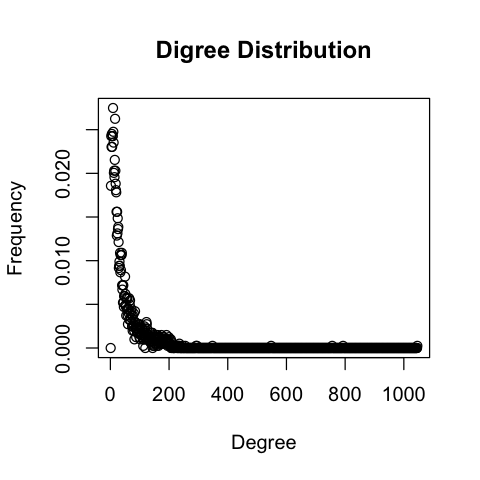

In [8]:
options(repr.plot.width=4, repr.plot.height=4)
plot(degree.distribution(fb_net), xlab="Degree", ylab="Frequency", main="Digree Distribution")
# hist(degree(fb_net), xlab="Degree", ylab="Frequency", main="Histogram")
mean(degree(fb_net))

- **Question 4**: Plot the degree distribution of question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.

                         (Intercept) logx[which(is.finite(logy) == TRUE)] 
                          -0.9922245                           -1.1801644 


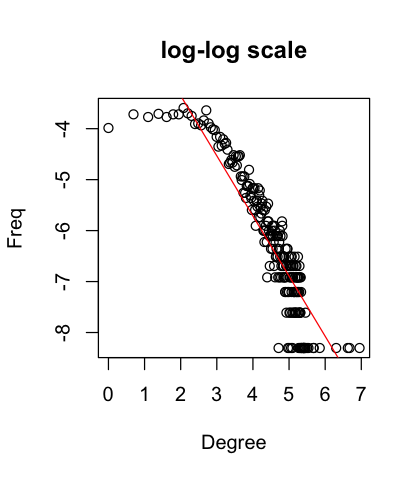

In [9]:
h = hist(degree(fb_net), breaks=seq(min(degree(fb_net))-0.5, max(degree(fb_net))+0.5, by=1), plot=FALSE)
logx = log(h$mids)
logy = log(h$density)
options(repr.plot.width=3.5, repr.plot.height=4)
plot(logx, logy, xlab="Degree",ylab="Freq", main="log-log scale")
reg <- lm(logy[which(is.finite(logy) == TRUE)] ~ logx[which(is.finite(logy) == TRUE)])
abline(reg, untf = F, col="red")
print(reg$coefficients)

#### 1.2 Personalized network
A personalized network of an user vi is defined as the subgraph induced by vi and it’s neighbors. In this part, we will study some of the structural properties of the personalized network of the user whose graph node ID is 1 (node ID in edgelist is 0). From this point onwards, whenever we are refering to a node ID we mean the graph node ID which is 1 + node ID in edgelist.

- **Question 5**: Create a personalized network of the user whose ID is 1. How many nodes and edges does this personalized network have?

In [10]:
pn_1 <- induced_subgraph(fb_net, c(1, neighbors(fb_net, 1)))
#subgraph_edges is changed to induced_subgraph which creates the subgraph
#with given vids in original graph
#http://igraph.org/r/doc/subgraph.html
vcount(pn_1)
ecount(pn_1)

[1] 348

[1] 2866

- **Question 6**: What is the diameter of the personalized network? Please state a trivial upper and lower bound for the diameter of the personalized network.

In [11]:
diameter(pn_1)

[1] 2

- **Question 7**: In the context of the personalized network, what is the meaning of the diameter of the personalized network to be equal to the upper bound you derived in question 6. What is the meaning of the diameter of the personalized network to be equal to the lower bound you derived in question 6?

    The diameter is defined as the largest shortest the path among any two vertices within the graph. The upper bond, 2, indicate that any two neighbors of one node are conected through the node. And the lower bond, 1, is for the case that the subgraph is completely connected.

#### 1.3 Core node’s personalized network
A core node is defined as the nodes that have more than 200 neighbors. For visualization purpose, we have displayed the personalized network of a core node below. In this part, we will study various properties of the personalized network of the core nodes.

- **Question 8**: How many core nodes are there in the Facebook network. What is the average degree of the core nodes?

In [12]:
fb_core <- which(degree(fb_net) > 200)
fb_core_count <- length(fb_core)
fb_core_degree = degree(fb_net, fb_core)

print(fb_core_count)
print(mean(fb_core_degree))

[1] 40
[1] 279.375


#### 1.3.1 Community structure of core node’s personalized network
In this part, we study the community structure of the core node’s personalized network. To be specific, we will study the community structure of the personalized network of the following core nodes:
- Node ID 1
- Node ID 108
- Node ID 349
- Node ID 484
- Node ID 1087

- **Question 9**: For each of the above core node’s personalized network, find the community structure using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare the modularity scores of the algorithms. For visualization purpose, display the community structure of the core node’s personalized networks using colors. Nodes belonging to the same community should have the same color and nodes belonging to different communities should have different color. In this question, you should have 15 plots in total.

In [13]:
q9 = function(graph, vid) {
    subg <- induced.subgraph(graph, c(vid, neighbors(graph, vid)))
    
    par(mfrow = c(3, 1))
    options(repr.plot.width=7, repr.plot.height=21)
    
    com <- fastgreedy.community(subg)
    mod = round(modularity(subg, membership(com)), digits = 4)
    plot(com, subg, vertex.size=5, vertex.label=NA, main=sprintf("Fast-Greedy modularity: %s", mod))

    com <- edge.betweenness.community(subg)
    mod = round(modularity(subg, membership(com)), digits = 4)
    plot(com, subg, vertex.size=5, vertex.label=NA, main=sprintf("Edge-Betweenness modularity: %s", mod))

    com <- cluster_infomap(subg)
    mod = round(modularity(subg, membership(com)), digits = 4)
    plot(com, subg, vertex.size=5, vertex.label=NA, main=sprintf("Infomap modularity: %s", mod))
}

> Fast-Greedy community algorithm

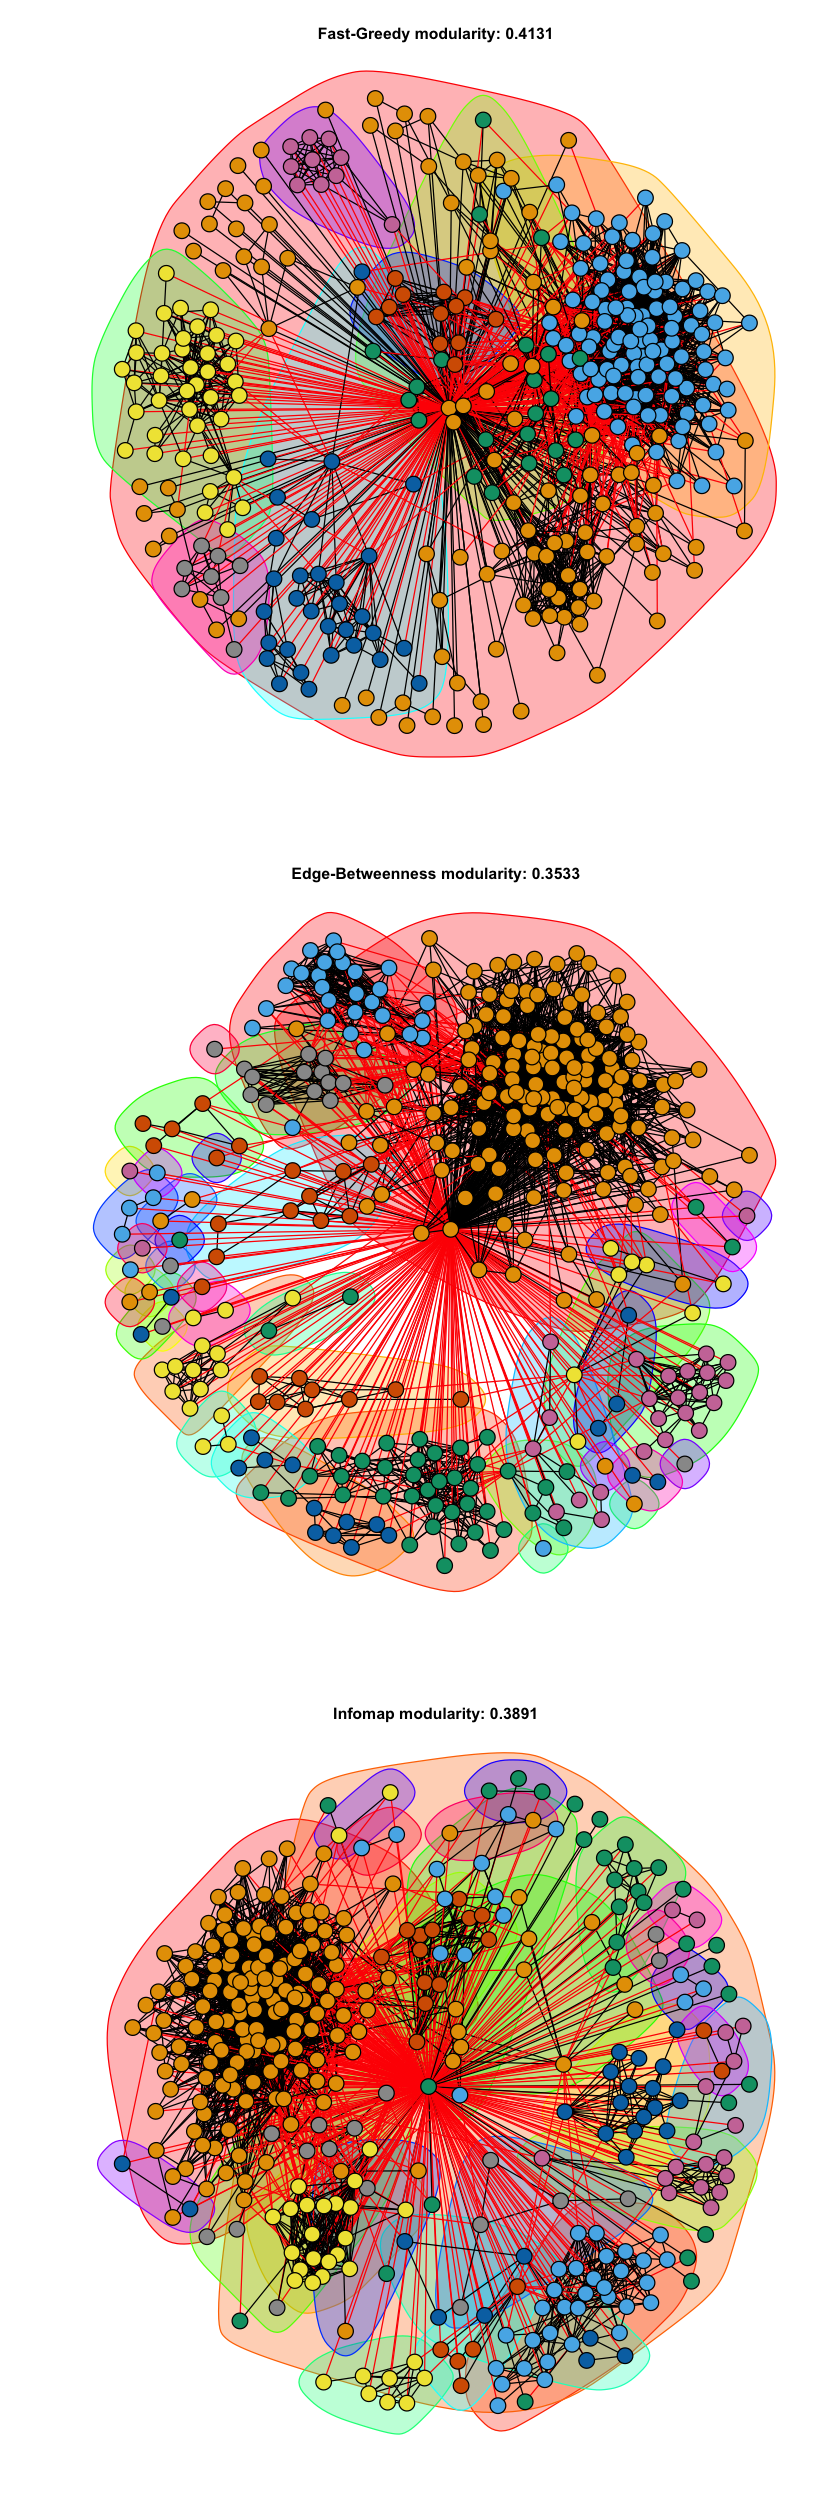

In [14]:
q9(fb_net, 1)
q9(fb_net, 108)
q9(fb_net, 349)
q9(fb_net, 484)
q9(fb_net, 1087)



#### 1.3.2 Community structure with the core node removed
In this part, we will explore the effect on the community structure of a core node’s personalized network when the core node itself is removed from the personalized network.

- **Question 10**: For each of the core node’s personalized network(use same core nodes as question 9), remove the core node from the personalized network and find the community structure of the modified personalized network. Use the same community detection algorithm as question 9. Compare the modularity score of the community structure of the modified personalized network with the modularity score of the community structure of the personalized network of question 9. For visualization purpose, display the community structure of the modified personalized network using colors. In this question, you should have 15 plots in total.

In [15]:
q10 = function(graph, vid) {
    subg <- induced.subgraph(graph, neighbors(graph, vid))
    
    par(mfrow = c(3, 1))
    options(repr.plot.width=7, repr.plot.height=21)
    
    com <- fastgreedy.community(subg)
    mod = round(modularity(subg, membership(com)), digits = 4)
    plot(com, subg, vertex.size=5, vertex.label=NA, main=sprintf("Fast-Greedy modularity: %s", mod))

    com <- edge.betweenness.community(subg)
    mod = round(modularity(subg, membership(com)), digits = 4)
    plot(com, subg, vertex.size=5, vertex.label=NA, main=sprintf("Edge-Betweenness modularity: %s", mod))

    com <- cluster_infomap(subg)
    mod = round(modularity(subg, membership(com)), digits = 4)
    plot(com, subg, vertex.size=5, vertex.label=NA, main=sprintf("Infomap modularity: %s", mod))
}

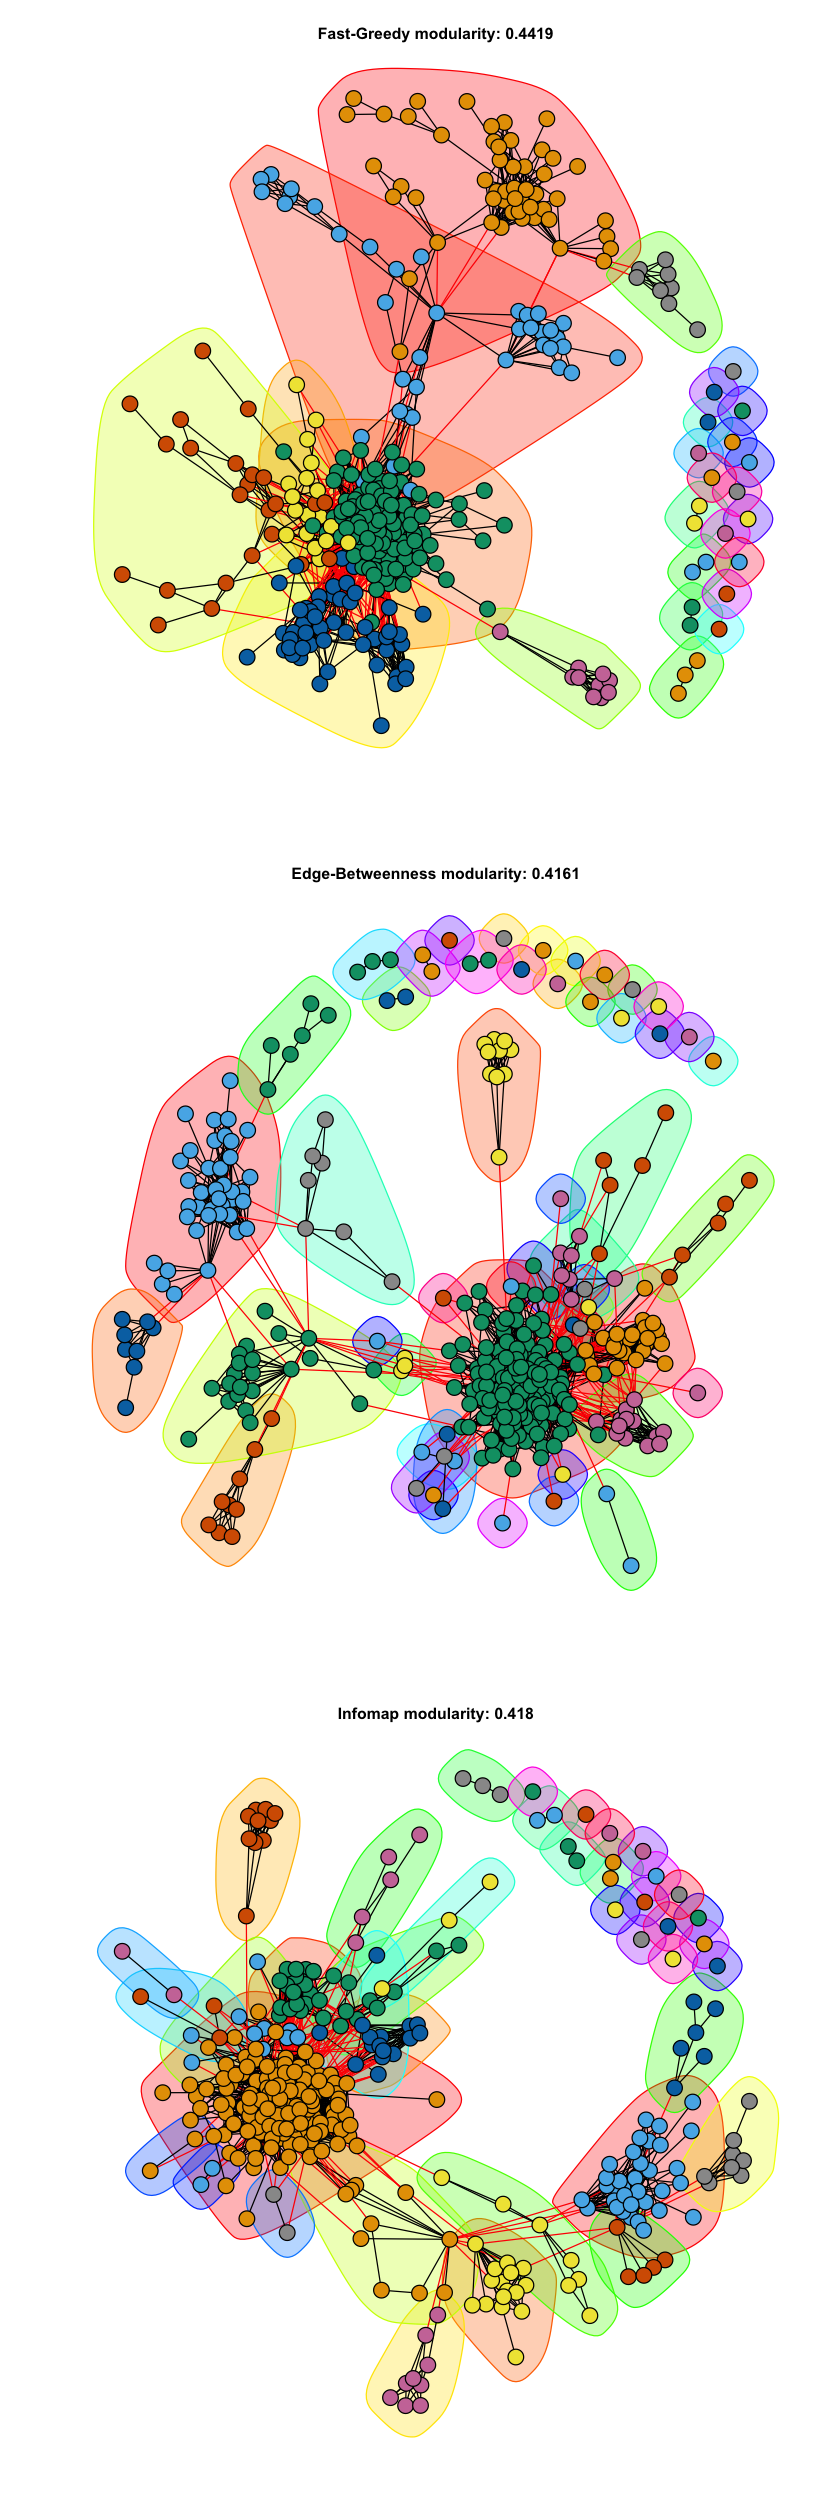

In [16]:
q10(fb_net, 1)
q10(fb_net, 108)
q10(fb_net, 349)
q10(fb_net, 484)
q10(fb_net, 1087)

#### 1.3.3 Characteristic of nodes in the personalized network
In this part, we will explore characteristics of nodes in the personalized network using two measures. These two measures are stated and defined below:
- Embeddedness of a node is defined as the number of mutual friends a node shares with the core node.
- Dispersion of a node is defined as the sum of distances between every pair of the mutual friends the node shares with the core node. The distances should be calculated in a modified graph where the node (whose dispersion is being computed) and the core node are removed.

For further details on the above characteristics, you can read the paper
below: http://arxiv.org/abs/1310.6753

- **Question 11**: Write an expression relating the Embeddedness of a node to it’s degree.

- **Question 12**: For each of the core node’s personalized network (use the same core nodes as question 9), plot the distribution of embeddedness and dispersion. In this question, you will have 10 plots.

In [301]:
q12_em = function(graph, vid){
    core_neighbors <- neighbors(graph, vid)
    embeddedness <- c()
    
    for(node in core_neighbors){
        node_neighbors <- neighbors(graph, node)
        mutualFriend <- intersect(node_neighbors, core_neighbors)
        embeddedness <- c(embeddedness, length(mutualFriend))
    }
    
    return(embeddedness)

}

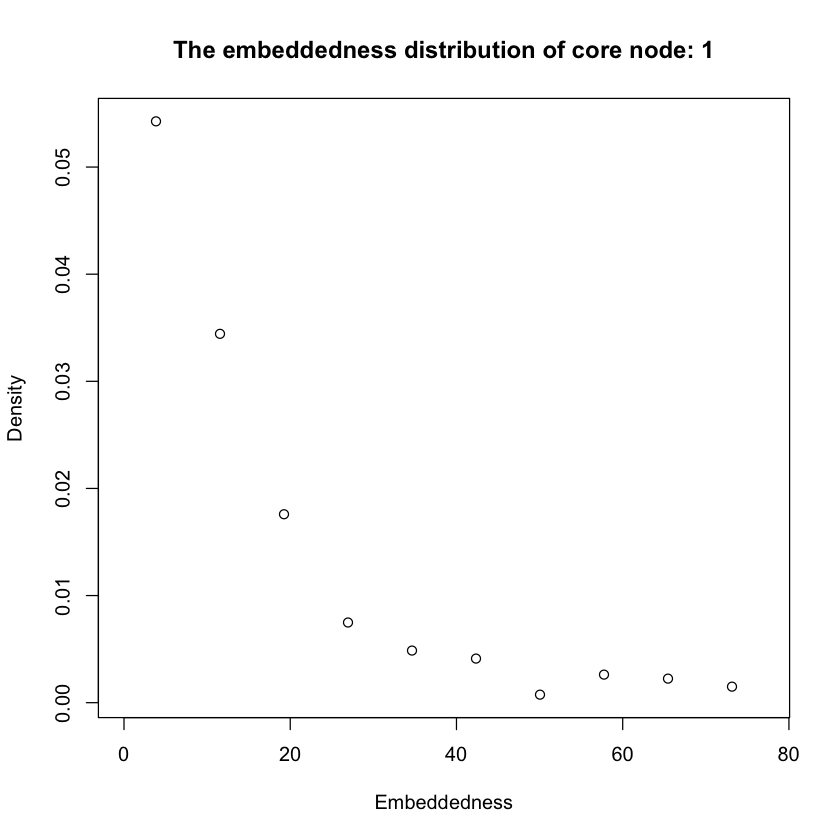

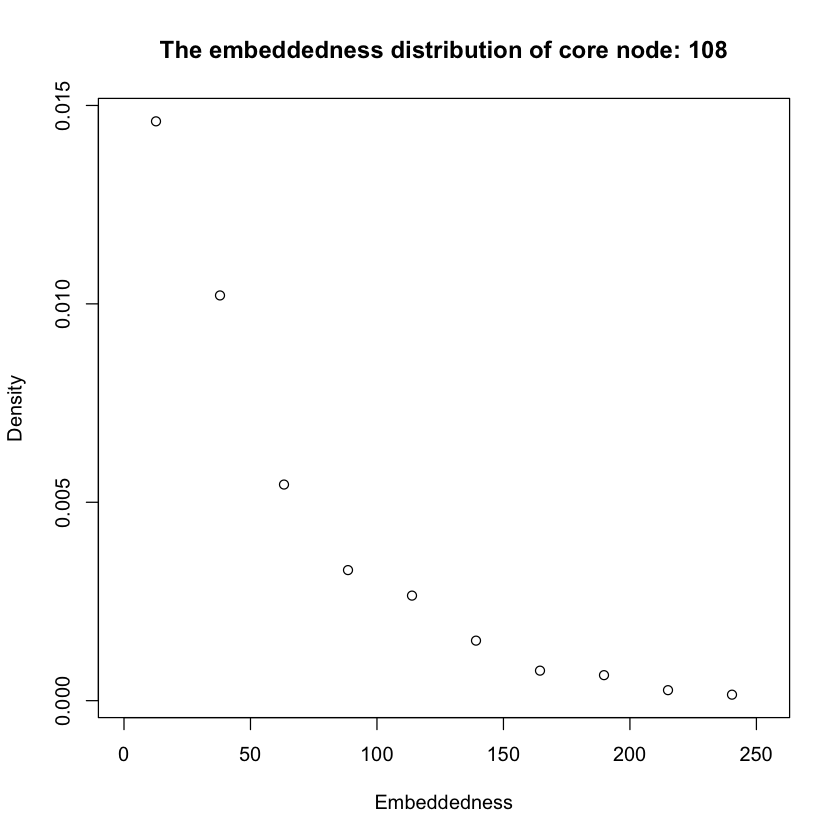

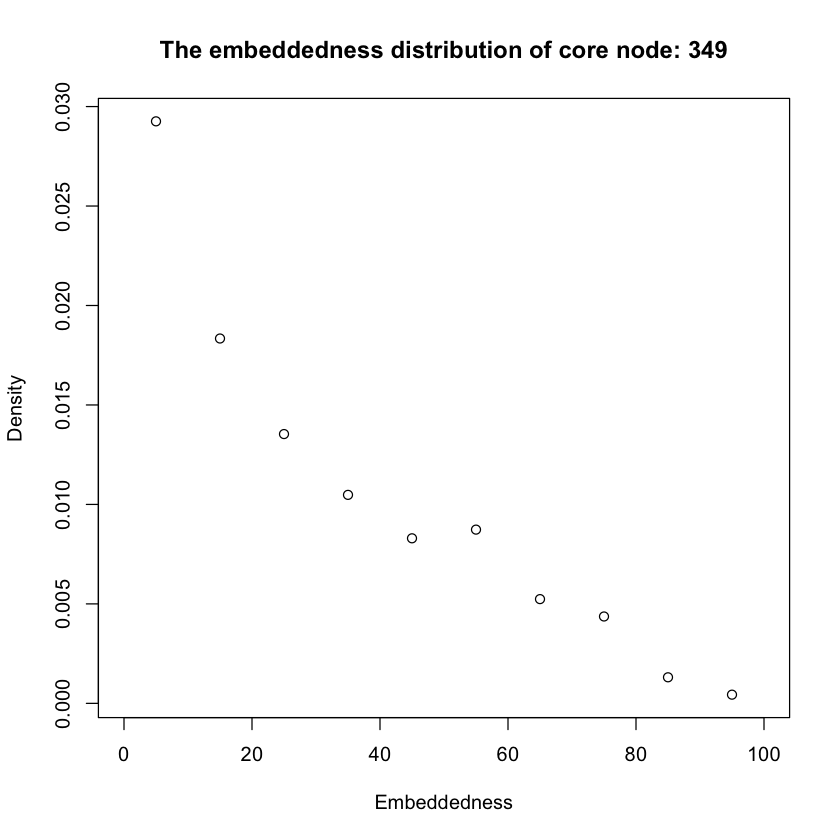

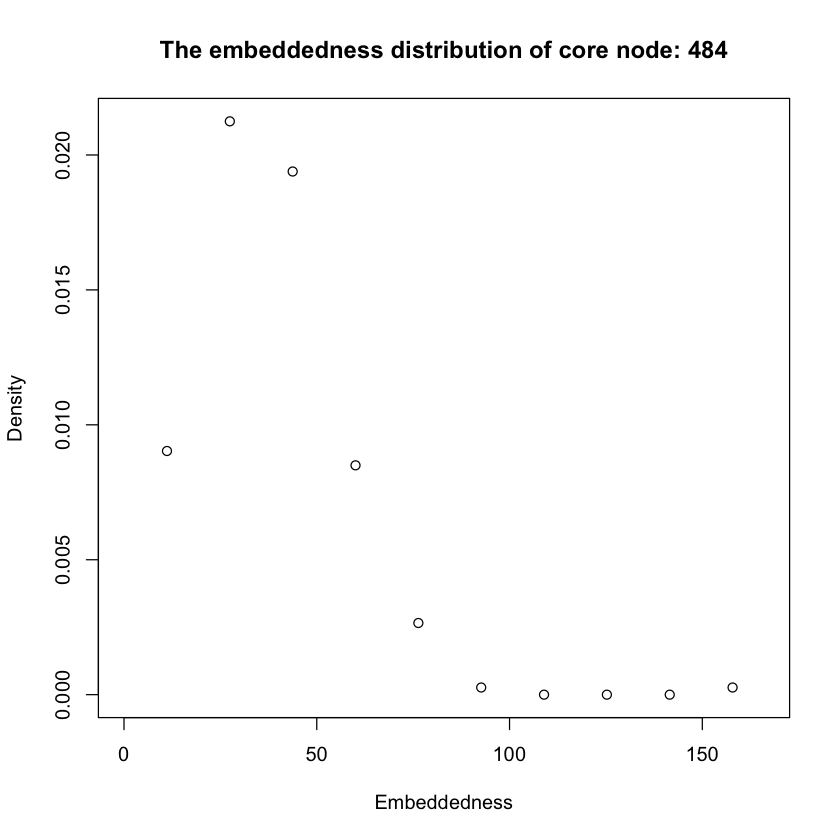

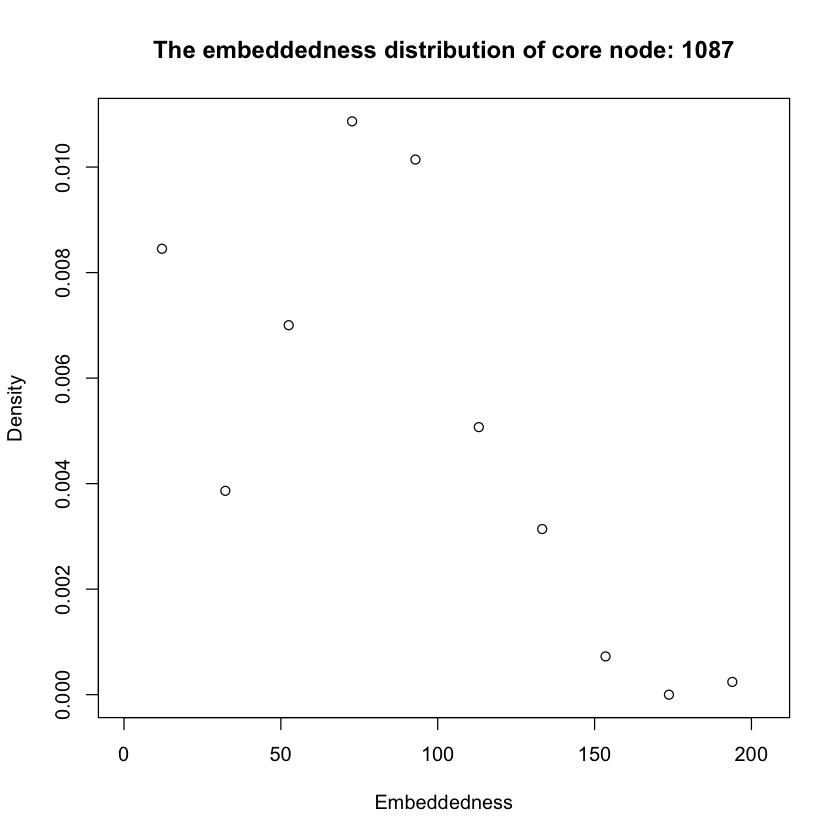

In [390]:
core_nodes = c(1, 108, 349, 484, 1087)

par(mfrow = c(1, 1))
options(repr.plot.width=7, repr.plot.height=7)

for(node in core_nodes){
    embeddedness <- q12_em(fb_net, node)
    h <- hist(embeddedness, breaks=seq(min(embeddedness), max(embeddedness), by=(max(embeddedness)-min(embeddedness))/10), plot = FALSE)
    plot(h$mids, h$density, main=sprintf("The embeddedness distribution of core node: %s", node), 
         xlab = "Embeddedness",ylab = "Density",xlim=c(0, max(embeddedness)))
}


In [392]:
q12_dis = function(graph, vid){
    core_neighbors <- neighbors(graph, vid)
    sub_graph <- induced_subgraph(graph, core_neighbors)
    dia <- diameter(induced_subgraph(graph, c(vid, core_neighbors)))
    dispersion <- c()
    
    for(node in V(sub_graph)){
        node_neighbors <- neighbors(sub_graph, node)
        mod_graph <- delete.vertices(sub_graph, node)
        mutualFriend <- match(node_neighbors$name, V(mod_graph)$name)
        distance <- distances(mod_graph, v = mutualFriend, to = mutualFriend)
        distance[which(is.infinite(distance) == TRUE)] <- dia
        temp_dispersion = sum(distance)/2 
        dispersion <- c(dispersion, temp_dispersion)
    }
    
    
    par(mfrow = c(1, 1))
    options(repr.plot.width=7, repr.plot.height=7)
    
    h <- hist(dispersion, breaks=seq(min(dispersion), max(dispersion), by=(max(dispersion)-min(dispersion))/10), plot = FALSE)
    plot(h$mids, h$density, main=sprintf("The Dispersion distribution of core node: %s", vid), 
         xlab = "Dispersion",ylab = "Density", xlim=c(0, max(dispersion)))
}

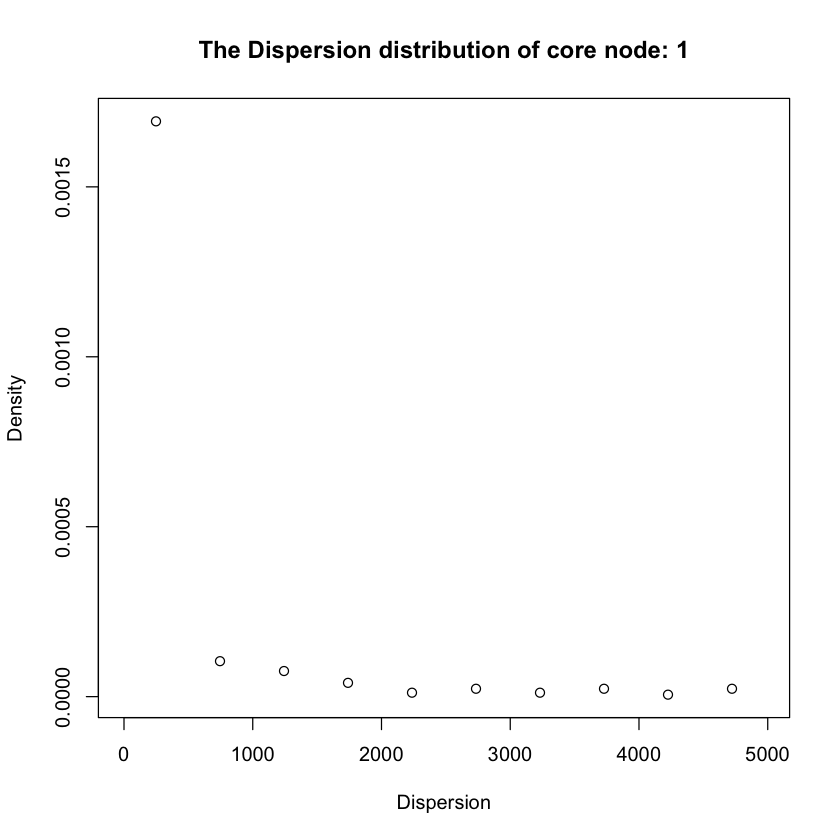

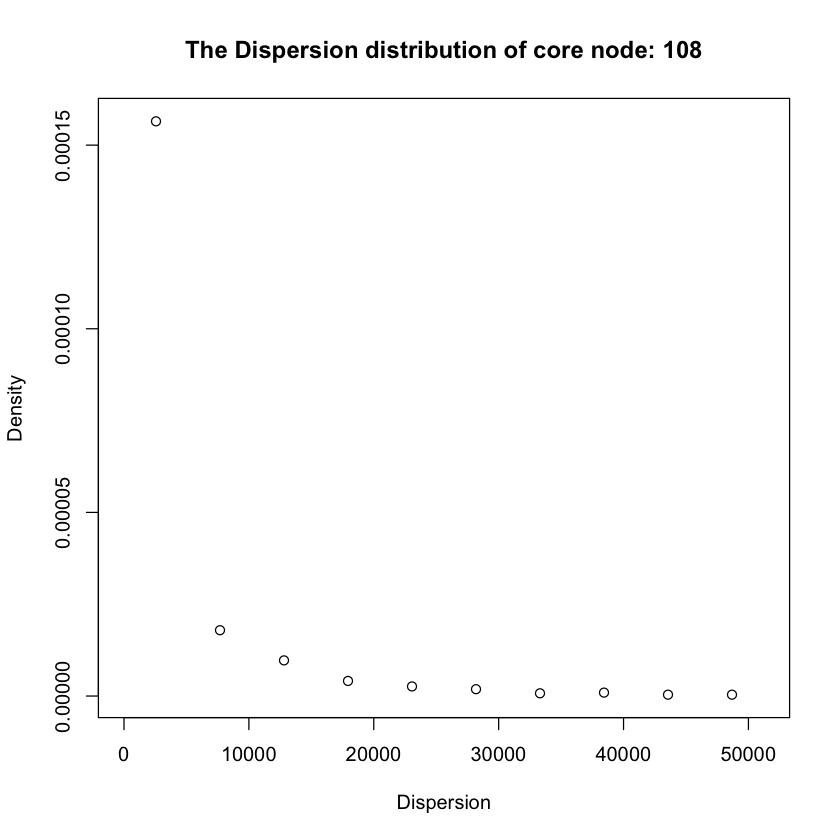

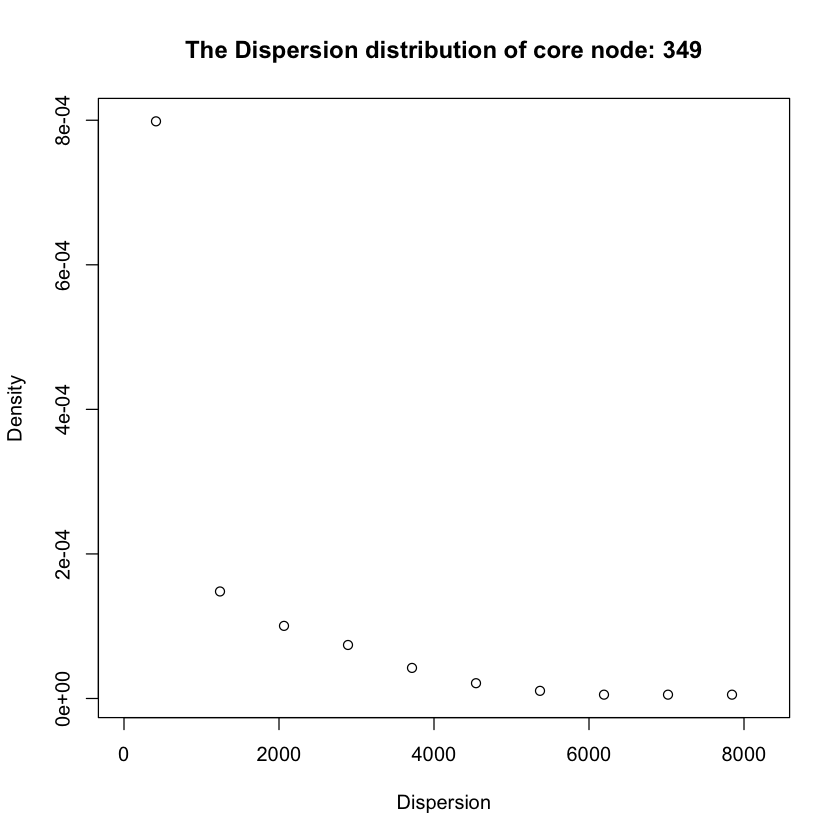

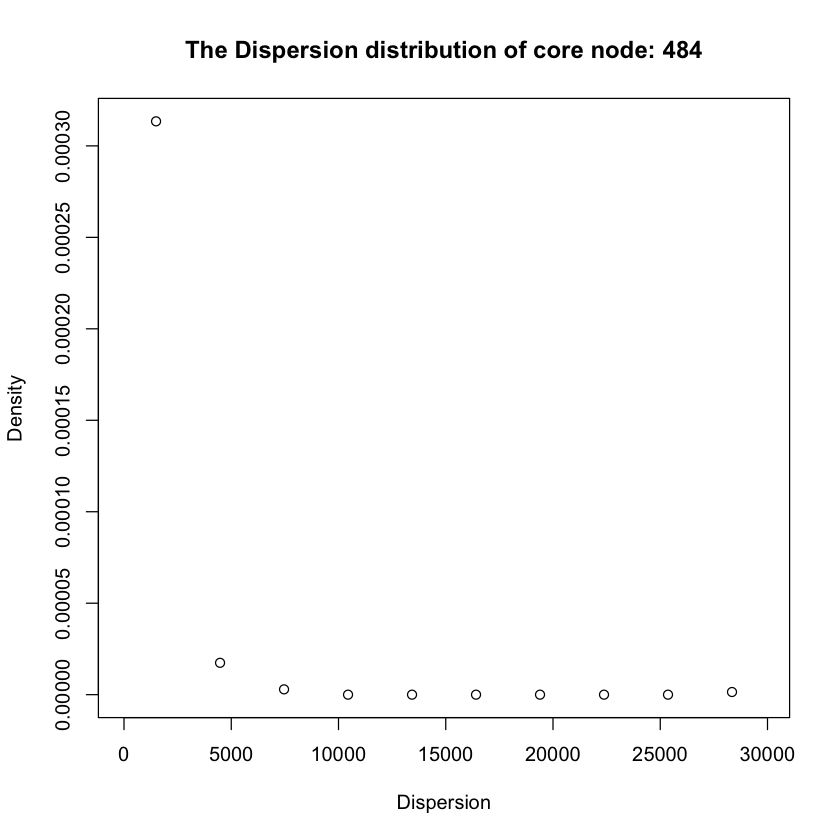

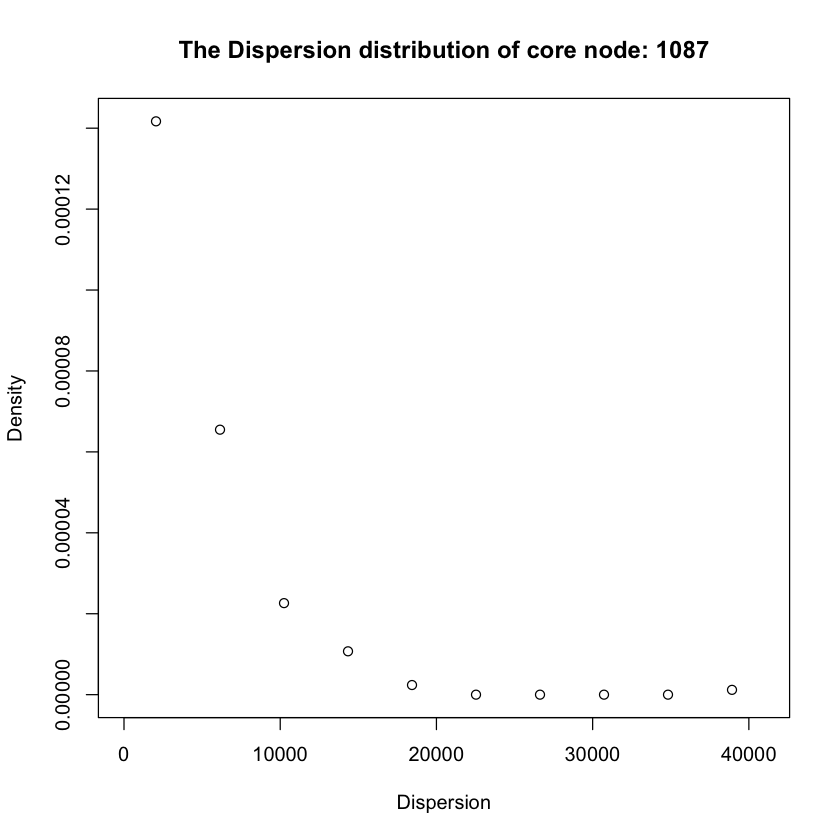

In [393]:
core_nodes = c(1, 108, 349, 484, 1087)

for(node in core_nodes){
    q12_dis(fb_net, node)
}

- **Question 13**: For each of the core node’s personalized network, plot the community structure of the personalized network using colors and highlight the node with maximum dispersion. Also, highlight the edges incident to this node. To detect the community structure, use Fast-Greedy algorithm. In this question, you will have 5 plots.

In [383]:
q13 = function(graph, vid){
    
    #create the personalized network of the core node 'vid'
    core_neighbors <- neighbors(graph, vid)
    per_net <- induced_subgraph(graph, c(vid, core_neighbors))
    per_net <- set_vertex_attr(per_net, "color", index = V(per_net), value = 'gray')

    #create the perosnalized network of the core node 'vid' without 'vid'
    #Equivlent to remove the core node 'vid ' from its personalzied the network
    sub_graph <- induced_subgraph(graph, core_neighbors)
    
    #find the diameters, it will be used to replace the dispersion of node that has no dispersion
    dia <- diameter(per_net)
    target_node <- 0
    taget_node_dispersion <- 0

    #find the node that has largest dispersion
    for(node in V(sub_graph)){
        node_neighbors <- neighbors(sub_graph, node)
        mod_graph <- delete.vertices(sub_graph, node)
        mutualFriend <- match(x = node_neighbors$name, table = V(mod_graph)$name)
        if(length(mutualFriend) >= 2){
            distance <- distances(mod_graph, v = mutualFriend, to = mutualFriend)
            distance[which(is.infinite(distance) == TRUE)] <- dia
            node_dispersion <- sum(distance)/2 

            if(node_dispersion > taget_node_dispersion){
                taget_node_dispersion <- node_dispersion
                target_node <- node
            }
        }

    }

    target_node <-match(x = V(sub_graph)[target_node]$name, table = V(per_net)$name)
    V(per_net)$color <- rgb(0.75, 0.75, 0.75, 0.5)
    E(per_net)$color <- 'gray75'
    l = layout_with_fr(per_net)

    com <- fastgreedy.community(per_net)
    mod <- round(modularity(per_net, membership(com)), digits = 4)
    E(per_net)[from(target_node)]$color = 'yellow'
    V(per_net)[target_node]$color = 'red'
    
    par(mfrow = c(1, 1))
    options(repr.plot.width=7, repr.plot.height=7)
    
    plot(com, per_net, col = V(per_net)$color, mark.col='gray90', vertex.size=5, vertex.label=NA, 
         edge.col = E(per_net)$color, layout = l, main=sprintf("Node: %s Fast-Greedy modularity: %s", vid, mod))
}

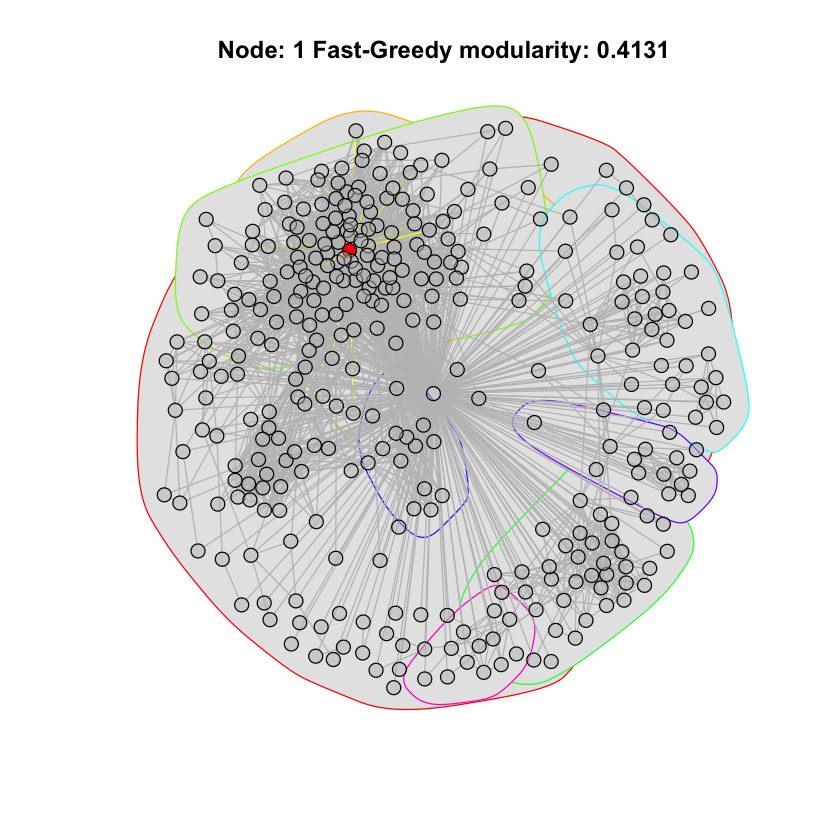

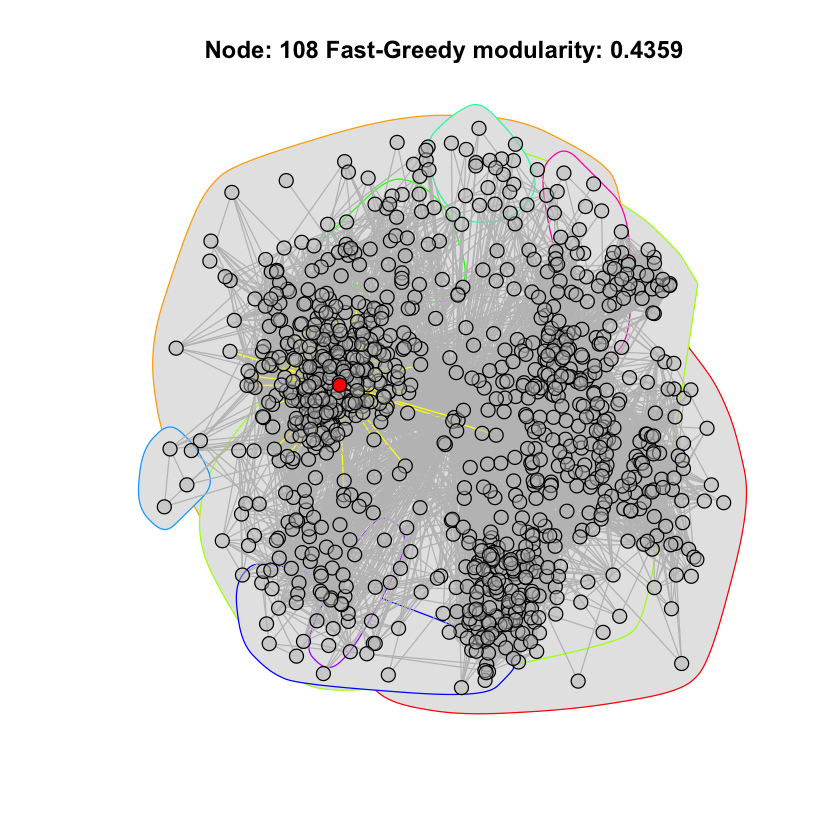

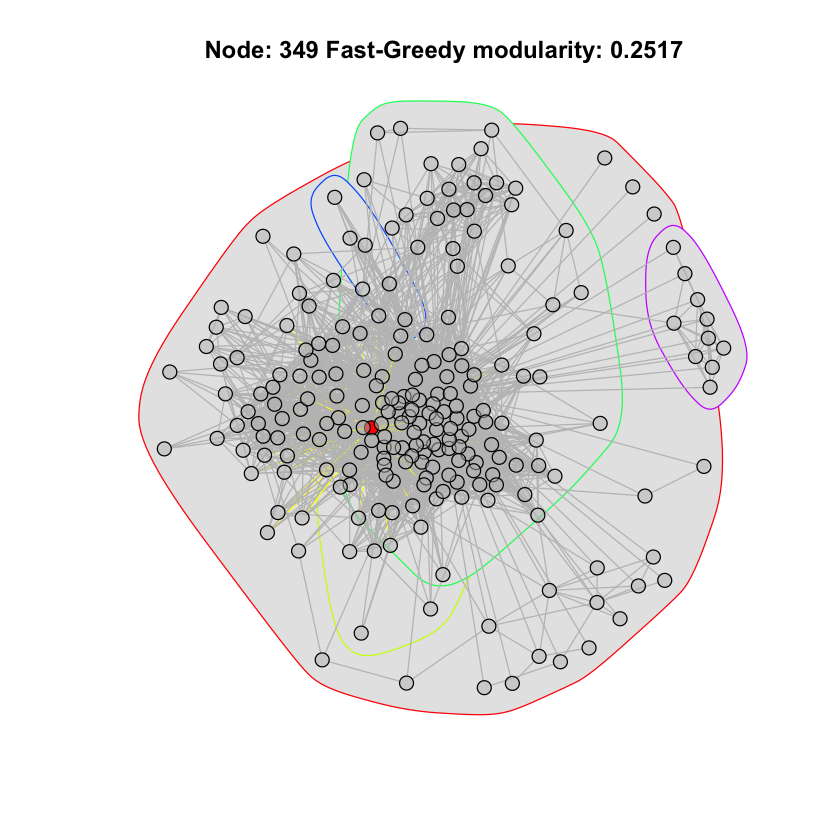

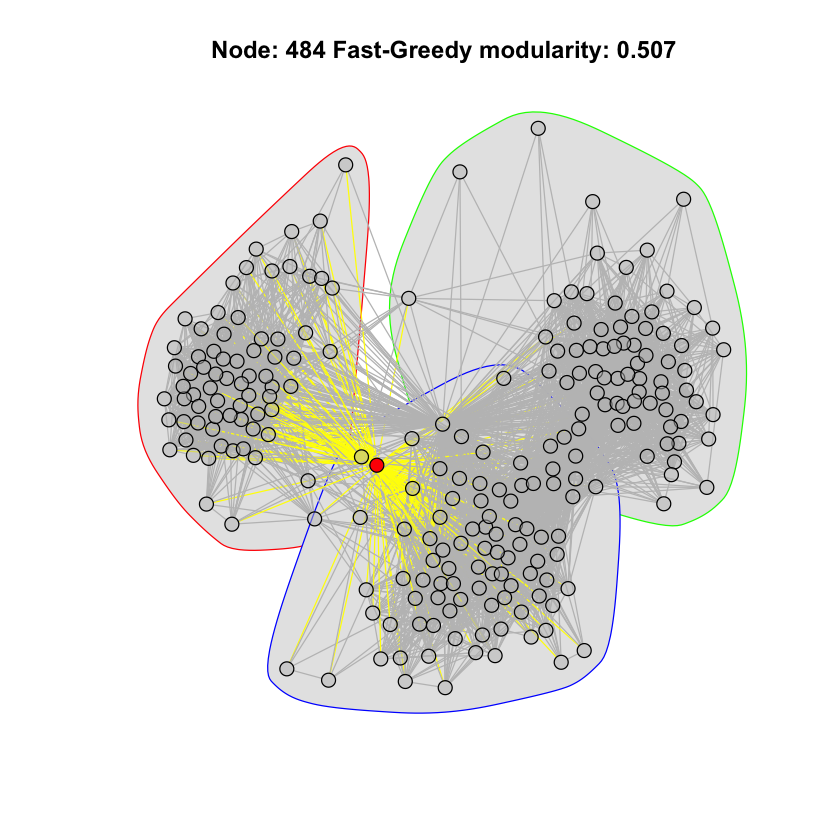

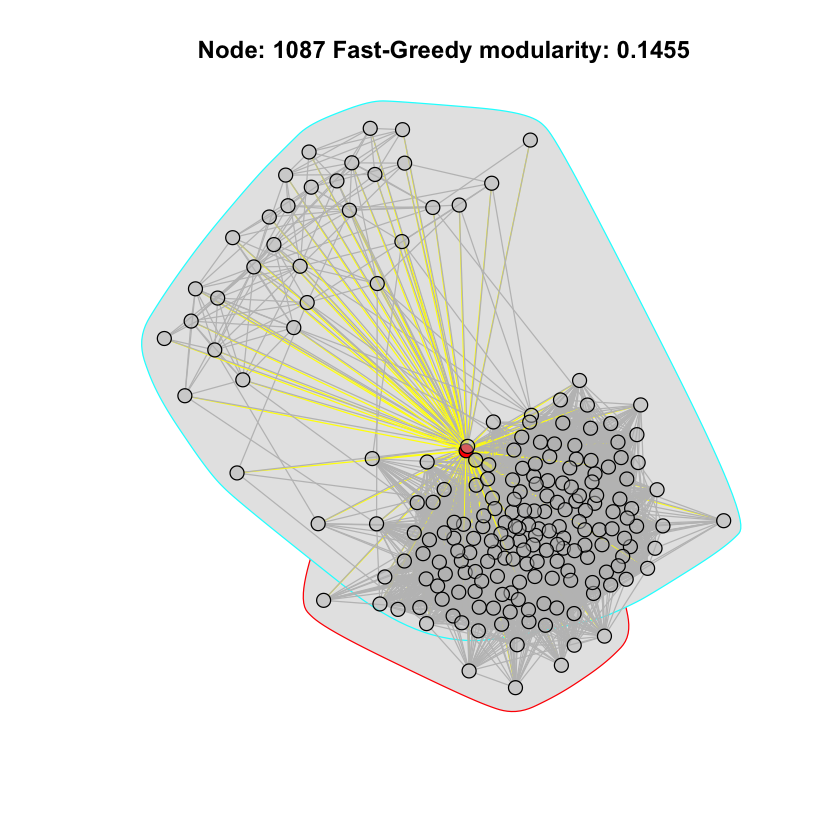

In [384]:
for(node in core_nodes){
    q13(fb_net, node)
}


- **Question 14**: Repeat question 13, but now highlight the node with maximum embeddedness and the node with maximum dispersion/embeddedness. Also, highlight the edges incident to these nodes

In [385]:
q14 = function(graph, vid){
    
    #create the personalized network of the core node 'vid'
    core_neighbors <- neighbors(graph, vid)
    per_net <- induced_subgraph(graph, c(vid, core_neighbors))
    per_net <- set_vertex_attr(per_net, "color", index = V(per_net), value = 'gray')

    #create the perosnalized network of the core node 'vid' without 'vid'
    #Equivlent to remove the core node 'vid ' from its personalzied the network
    sub_graph <- induced_subgraph(graph, core_neighbors)
    
    #find the diameters, it will be used to replace the dispersion of node that has no dispersion
    dia <- diameter(per_net)
    target_node <- 0
    taget_node_DE_ratio <- 0

    

    

    #find the node that has largest dispersion
    for(node in V(sub_graph)){
        node_neighbors <- neighbors(sub_graph, node)
        mod_graph <- delete.vertices(sub_graph, node)
        mutualFriend <- match(x = node_neighbors$name, table = V(mod_graph)$name)
        
        embeddedness <- length(mutualFriend)
        
        if(embeddedness >= 2){
            distance <- distances(mod_graph, v = mutualFriend, to = mutualFriend)
            distance[which(is.infinite(distance) == TRUE)] <- dia
            dispersion = sum(distance)/2
        
            temp_DE_ratio <- dispersion / embeddedness
            if(temp_DE_ratio > taget_node_DE_ratio){
                target_node_DE_ratio <- temp_DE_ratio
                target_node <- node
            }
        }

    }

    target_node <-match(x = V(sub_graph)[target_node]$name, table = V(per_net)$name)
    V(per_net)$color <- rgb(0.75, 0.75, 0.75, 0.5)
    E(per_net)$color <- 'gray75'
    l = layout_with_fr(per_net)

    com <- fastgreedy.community(per_net)
    mod <- round(modularity(per_net, membership(com)), digits = 4)
    E(per_net)[from(target_node)]$color = 'yellow'
    V(per_net)[target_node]$color = 'red'
    
    par(mfrow = c(1, 1))
    options(repr.plot.width=7, repr.plot.height=7)
    
    plot(com, per_net, col = V(per_net)$color, mark.col='gray90', vertex.size=5, vertex.label=NA, 
    edge.col = E(per_net)$color, layout = l, main=sprintf("Node: %s Fast-Greedy modularity: %s", vid, mod))
}

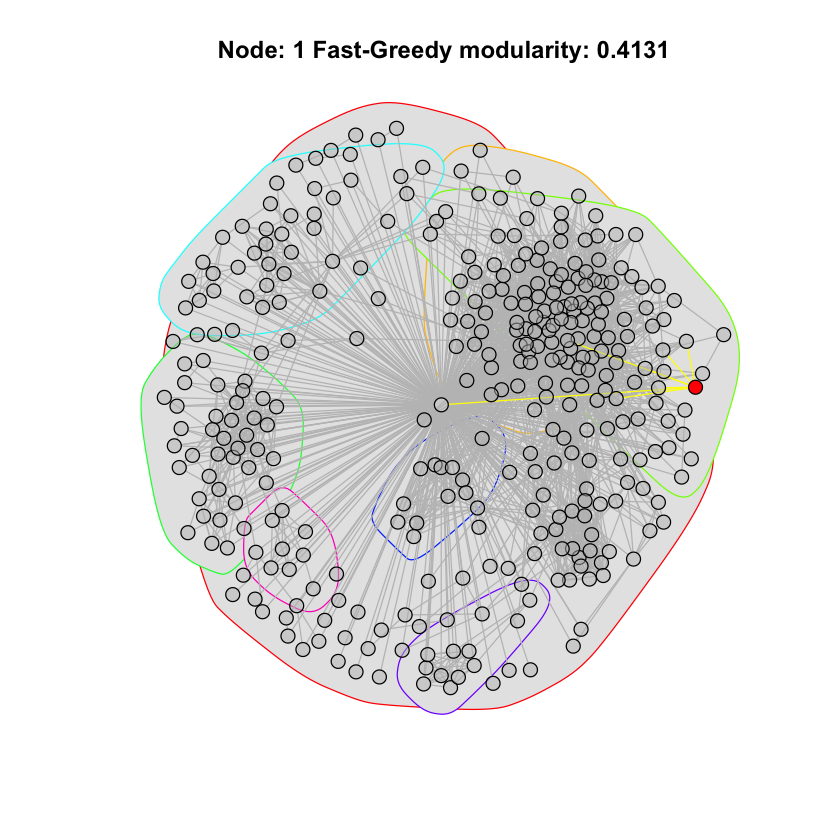

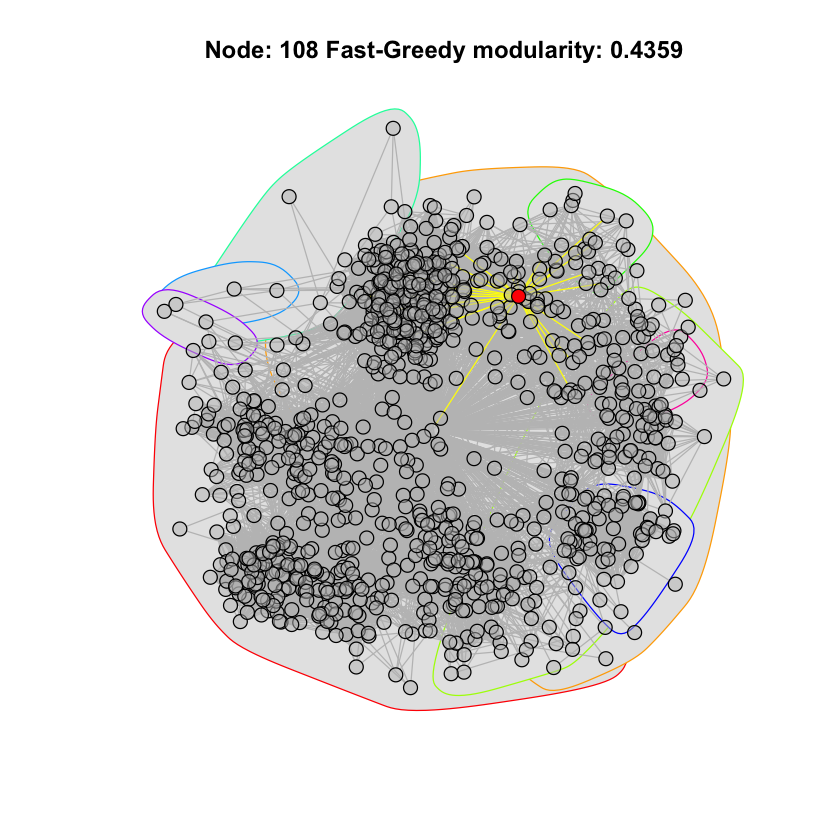

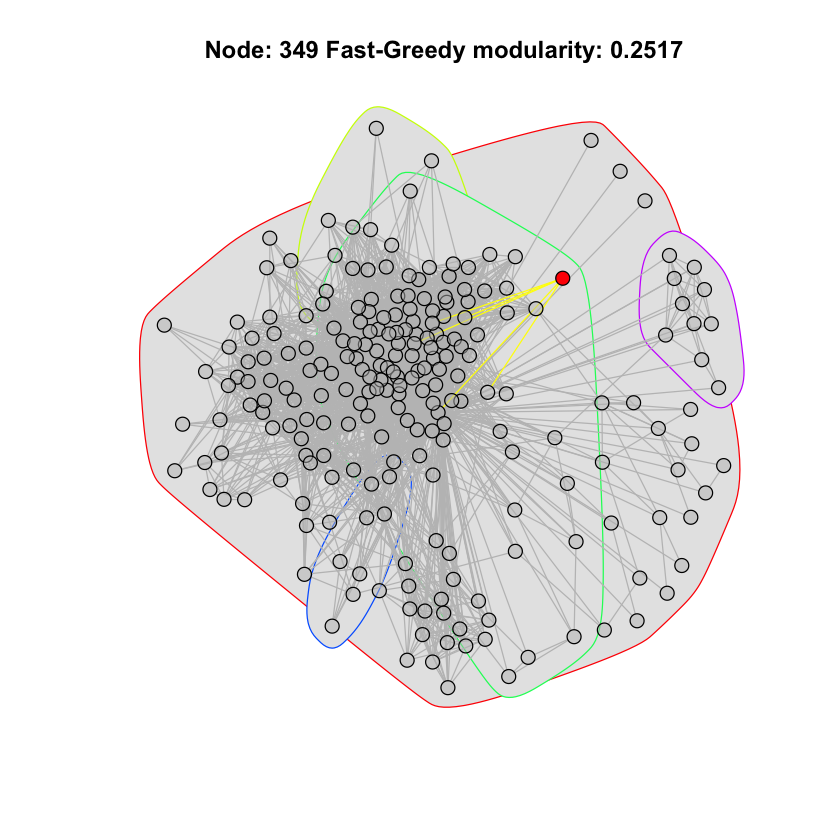

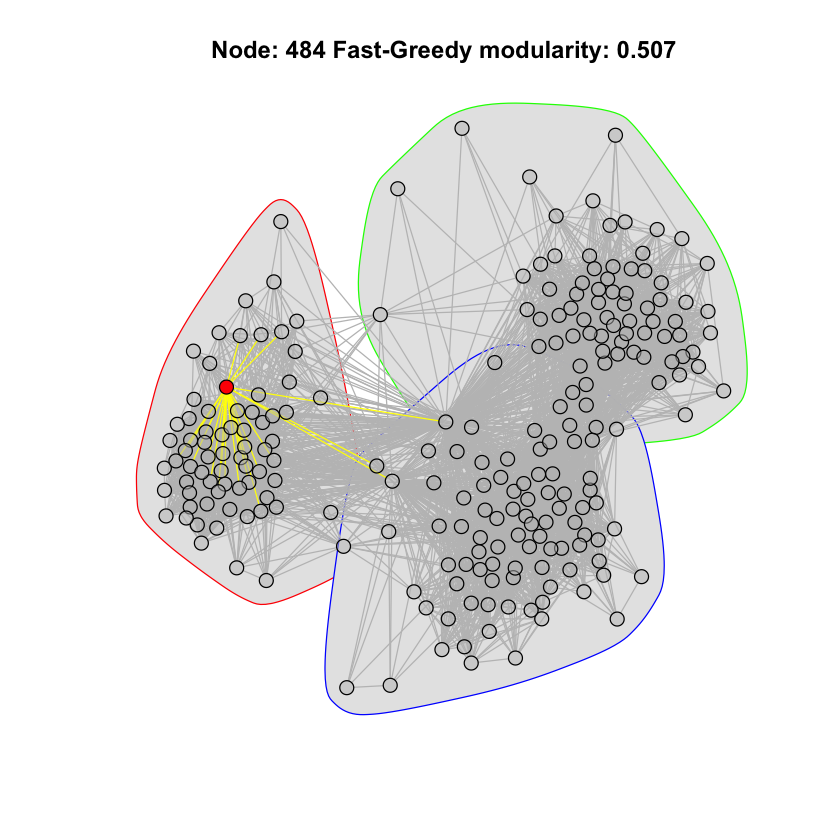

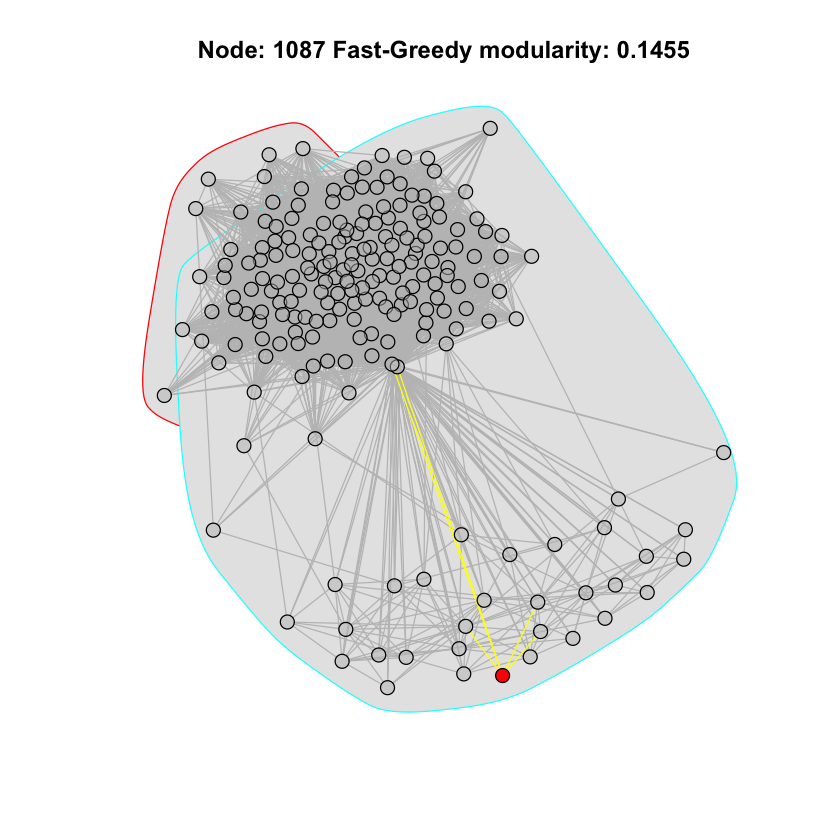

In [388]:

for(node in core_nodes){
    q14(fb_net, node)
}

- **Question 15**: Use the plots from questions 13 and 14 to explain the
characteristics of a node revealed by each of this measure.

#### 1.4 Friend recommendation in personalized networks
In many social networks, it is desirable to predict future links between pairs of nodes in the network. In the context of this Facebook network it is equivalent to recommending friends to users. In this part of the project, we will explore some neighborhood-based measures for friend recommendation. The network that we will be using for this part is the personalized network of node with ID 415.
#### 1.4.1 Neighborhood based measure
#### 1.4.2 Friend recommendation using neighborhood based measures
#### 1.4.3 Creating the list of users

- **Question 16**: What is |Nr|?

#### 1.4.4 Average accuracy of friend recommendation algorithm

- **Question 17**: Compute the average accuracy of the friend recommendation algorithm that uses:
    - Common Neighbors measure
    - Jaccard measure
    - Adamic Adar measure

Based on the average accuracy values, which friend recommendation
algorithm is the best?

In [426]:
Common_Neighbor = function(graph, vid1, vid2){
    
    CN_measure <- 0
    
    if(vid1 != vid2){
        node1_neighbors <- neighbors(graph, vid1)
        node2_neighbors <- neighbors(graph, vid2)
        CN_measure <- length(intersect(node1_neighbors, node2_neighbors))
    }

    
    return(CN_measure)
}



In [427]:
Jaccard = function(graph, vid1, vid2){
    
    J_measure <- 0
    if(vid1 != vid2){
        node1_neighbors <- neighbors(graph, vid1)
        node2_neighbors <- neighbors(graph, vid2)
        CN_measure <- length(intersect(node1_neighbors, node2_neighbors))
        node_union_mod <- length(union(node1_neighbors, node2_neighbors))
        J_measure = CN_measure/node_union_mod
    }
    return(J_measure) 
}

In [428]:
AdamicAdar = function(graph, vid1, vid2){
    
    A_measure <- 0
    if(vid1 != vid2){
        node1_neighbors <- neighbors(graph, vid1)
        node2_neighbors <- neighbors(graph, vid2)
        mutualFriend <- intersect(node1_neighbors, node2_neighbors)
        for (node in mutualFriend){
            node_neighbor <- neighbors(graph, node)
            A_measure <- A_measure + 1/log(length(node_neighbor))
        }
    }
    return(A_measure) 
}

[1] 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0

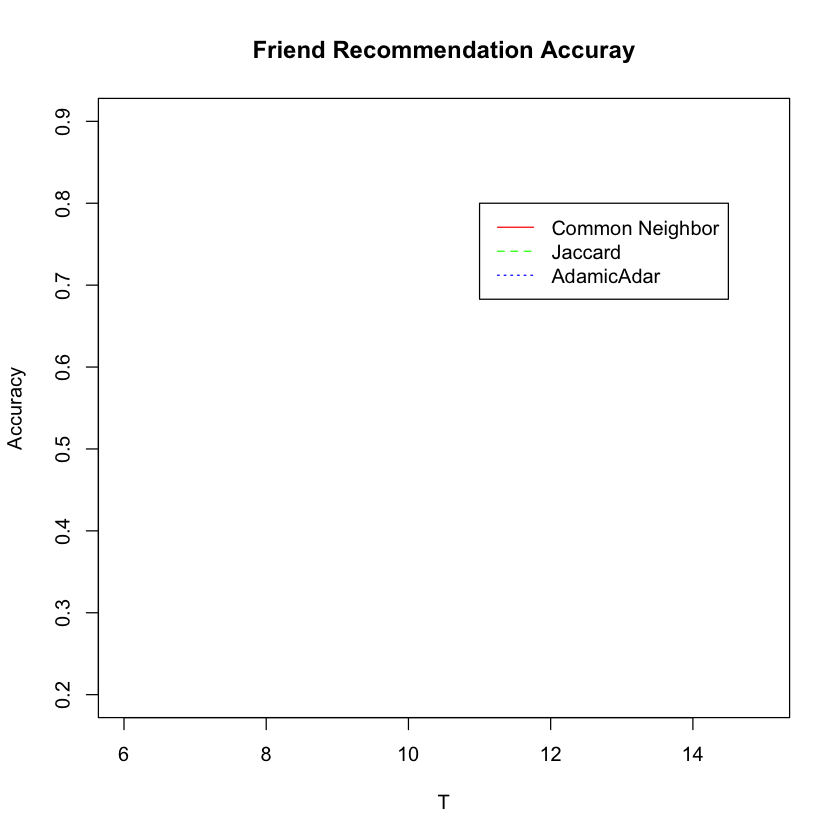

In [429]:
c_mean_accuracy <- c()
j_mean_accuracy <- c()
a_mean_accuracy <- c()
T <- seq(from = 6, to = 15)

for(t in T){
    num_trial <- 10


    per_net_415 <- induced_subgraph(fb_net, c(415, neighbors(fb_net, 415)))
    test_list <- which(degree(per_net_415) == 24)

    c_accuracy_test_list <- c()
    j_accuracy_test_list <- c()
    a_accuracy_test_list <- c()

    for(test_node in test_list){
        test_node_neighbors <- neighbors(per_net_415, test_node)
    
        c_accuracy_test_node <- c()
        j_accuracy_test_node <- c()
        a_accuracy_test_node <- c()
    
        for(i in 1:num_trial){
        
            #create the fair coin
            flipped_coin <- runif(length(test_node_neighbors))
            head_of_coin <- which(flipped_coin <= 0.25)

            #unfriend those node that has bad luck
            per_net_415_unfriended <- delete_edges(per_net_415, E(per_net_415)[from(test_node)][head_of_coin])
          
            #find the remaining neighbors
            test_node_neighbors_unfriended <- neighbors(per_net_415_unfriended, test_node)
        
            #identify the neighbors that have been unfriended
            unfriended_neightbors <- setdiff(test_node_neighbors$name, test_node_neighbors_unfriended$name)
        
        
            #recommend friends to the test_node in the new modified network
            friend_candidate_c <- c()
            friend_candidate_j <- c()
            friend_candidate_a <- c()
        
            c_measure <- c()
            j_measure <- c()
            a_measure <- c()
            strangers <- setdiff(V(per_net_415_unfriended), c(test_node, test_node_neighbors_unfriended))

            for(stranger in strangers){
                c_measure <- c(c_measure, Common_Neighbor(per_net_415_unfriended, test_node, stranger))
                j_measure <- c(j_measure, Jaccard(per_net_415_unfriended, test_node, stranger))
                a_measure <- c(a_measure, AdamicAdar(per_net_415_unfriended, test_node, stranger))
            }
            friend_candidate_c <- strangers[order(-c_measure)[1:t]]
            friend_candidate_j <- strangers[order(-j_measure)[1:t]]
            friend_candidate_a <- strangers[order(-a_measure)[1:t]]

            c_accuracy_test_node <- c(c_accuracy_test_node, 
                                      length(intersect(friend_candidate_c, unfriended_neightbors))/length(friend_candidate_c))
            j_accuracy_test_node <- c(j_accuracy_test_node, 
                                      length(intersect(friend_candidate_j, unfriended_neightbors))/length(friend_candidate_j))
            a_accuracy_test_node <- c(a_accuracy_test_node, 
                                      length(intersect(friend_candidate_a, unfriended_neightbors))/length(friend_candidate_a))
        }
    
        c_accuracy_test_list <- c(c_accuracy_test_list, mean(c_accuracy_test_node))
        j_accuracy_test_list <- c(j_accuracy_test_list, mean(j_accuracy_test_node))
        a_accuracy_test_list <- c(a_accuracy_test_list, mean(a_accuracy_test_node))

    }

    c_mean_accuracy <- c(c_mean_accuracy, mean(c_accuracy_test_list))
    j_mean_accuracy <- c(j_mean_accuracy, mean(j_accuracy_test_list))
    a_mean_accuracy <- c(a_mean_accuracy, mean(a_accuracy_test_list))
}

plot(T, c_mean_accuracy, col = "red", type = "l", main="Friend Recommendation Accuray", 
     ylim = c(0.2, 0.9), xlim = c(6, 15), xlab = "T", ylab = "Accuracy", lty = 1)

lines(T, j_mean_accuracy, col = "green", lty = 2)
lines(T, a_mean_accuracy, col = "blue", lty = 3)
legend(11, 0.8, legend=c("Common Neighbor", "Jaccard", "AdamicAdar"),
       col=c("red", "green", "Blue"), cex=1, lty = c(1,2,3))

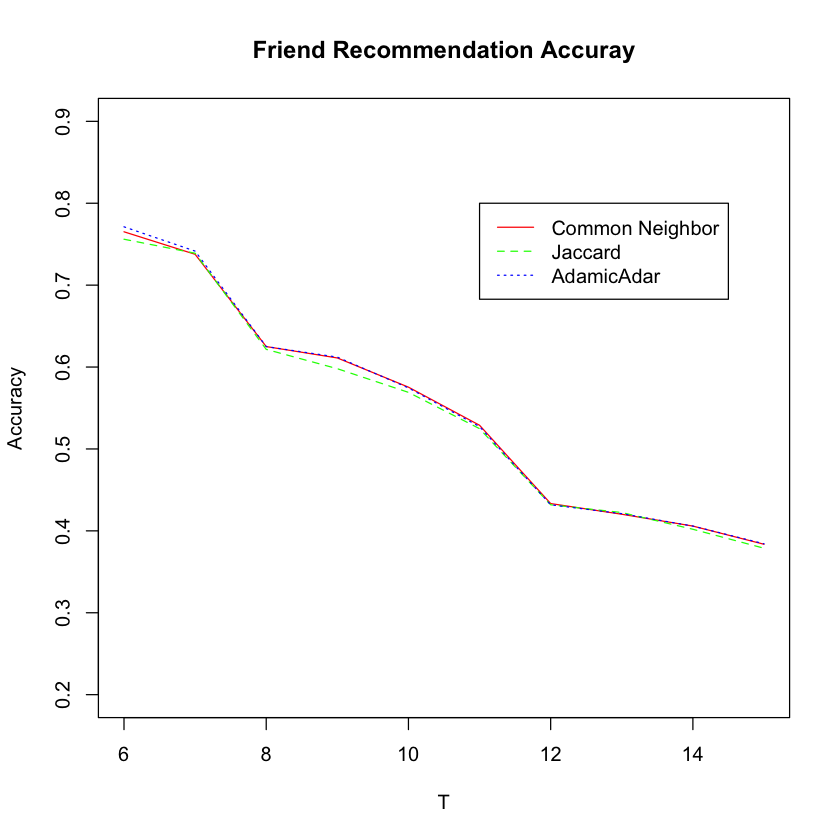

In [425]:
plot(T, c_mean_accuracy, col = "red", type = "l", main="Friend Recommendation Accuray", 
     ylim = c(0.2, 0.9), xlim = c(6, 15), xlab = "T", ylab = "Accuracy", lty = 1)

lines(T, j_mean_accuracy, col = "green", lty = 2)
lines(T, a_mean_accuracy, col = "blue", lty = 3)
legend(11, 0.8, legend=c("Common Neighbor", "Jaccard", "AdamicAdar"),
       col=c("red", "green", "Blue"), cex=1, lty = c(1,2,3))